## Predictive Model for Human Lifespan

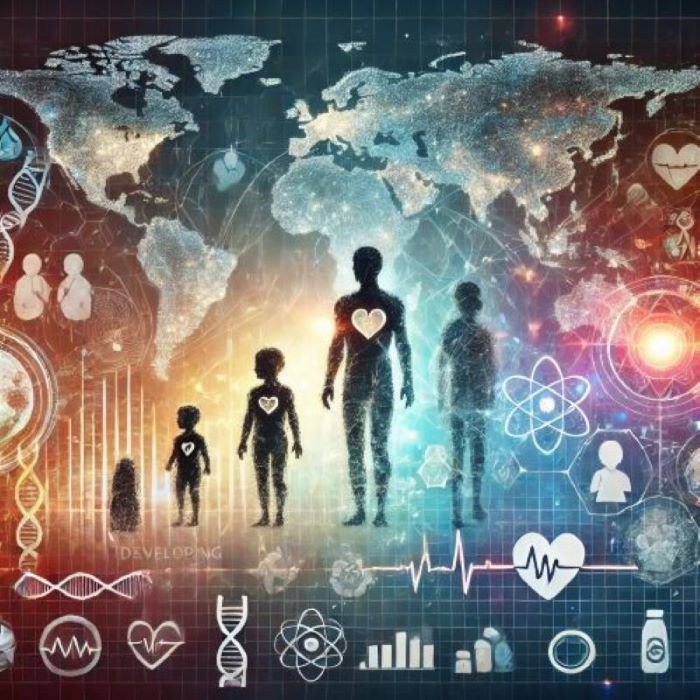

## 1. Problem statement:

    Developing a Predictive Model for Human Lifespan is a data-driven project that analyzes demographic, health, lifestyle, and environmental factors to predict lifespan using machine learning. By leveraging diverse datasets and identifying critical predictors of longevity, the project aims to provide accurate predictions and actionable insights for personalized healthcare, public health policy, and preventive care strategies to promote healthier, longer lives.

## 2. Objectives: 

    Identify and evaluate the critical factors, such as health metrics, diet, lifestyle habits, and medical conditions, that contribute to variations in human lifespan.
    Build a robust machine learning model capable of accurately estimating a person's expected lifespan based on input features like health index, lifestyle scores, diet, and medical history.
    Use the model to simulate how changes in lifestyle, diet, or medical interventions might influence an individual's lifespan, providing actionable insights.
    Design the model to be scalable for integration into healthcare systems, wellness applications, or personalized health platforms.
    Test and validate the model using real-world data to ensure reliability and applicability for practical use.

## 3. Dataset Information
     The dataset for this project includes demographic, health, lifestyle, environmental, and socioeconomic variables, such as age, diet,   medical history, physical activity, and chronic diseases. It provides comprehensive data to train a machine learning model for accurate      lifespan prediction and factor analysis.
     
       Where to Get the Dataset: You can download the dataset from Kaggle 
             https://www.kaggle.com/datasets/amansaxena/lifeexpectancy

In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [7]:
# Load the dataset
df = pd.read_csv(r"C:\Users\shrus\Downloads\Life Expectancy Data.csv")

# Display the first few rows to understand the structure
print(df.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [9]:
# Check for missing values
print(df.isnull().sum()) 
df = df.dropna()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [11]:
# Features (independent variable) and target (dependent variable)
x = df[['Year','Adult Mortality', 'infant deaths','Alcohol','percentage expenditure','Hepatitis B',' BMI ','Polio','Diphtheria ',' HIV/AIDS',
        'GDP','Income composition of resources','Schooling']]  
# Dependent variable (Life expectancy)
y = df['Life expectancy ']  

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([70.31922153, 73.49143702, 81.24323686, 54.09174365, 51.45684312,
       51.0541676 , 70.8849194 , 76.44813101, 78.50116691, 73.60714165,
       74.49838655, 75.55121788, 77.69847494, 68.47858359, 66.25764978,
       69.97517324, 79.30444347, 81.29044892, 76.16220537, 70.31616153,
       79.20341043, 71.97168075, 70.09866381, 74.88063917, 65.2197988 ,
       70.93652652, 74.43347364, 76.21526836, 80.81075837, 72.64542881,
       64.89275446, 60.82810329, 69.21571299, 81.17743051, 77.12971548,
       79.14049075, 60.35454828, 55.58831178, 72.97943024, 79.40033509,
       61.61685491, 75.61858149, 72.88420919, 72.79478669, 76.81622696,
       62.07474099, 73.3030309 , 57.86883077, 68.54103933, 73.16045774,
       62.89044471, 66.1973374 , 56.3012212 , 73.0508237 , 74.00225741,
       55.32300938, 76.5187334 , 75.31838878, 72.62623882, 62.63667493,
       59.95130334, 60.04862777, 68.55795006, 74.07947611, 71.08783104,
       76.87164519, 59.76847947, 76.91682724, 78.71851648, 68.87

In [19]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate R-Squared value
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")

Mean Squared Error: 13.31364141833194
R-Squared: 0.8125432880081696


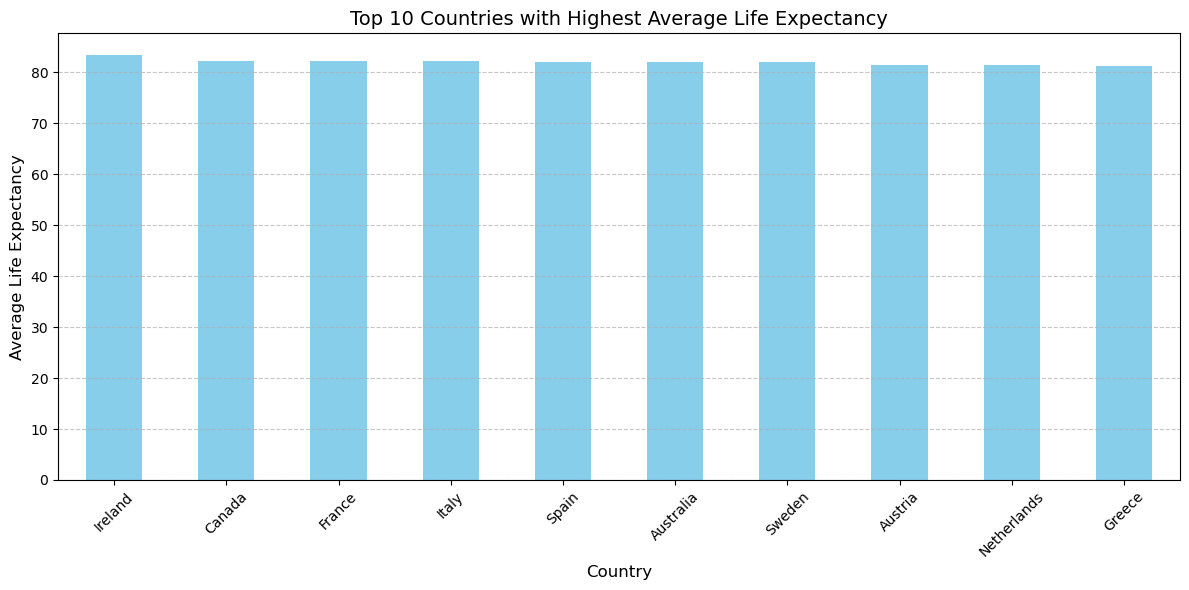

In [21]:
country_life_expectancy = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)

# Plot the top 10 countries with the highest average life expectancy
plt.figure(figsize=(12, 6))
country_life_expectancy.head(10).plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Top 10 Countries with Highest Average Life Expectancy', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Life Expectancy', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

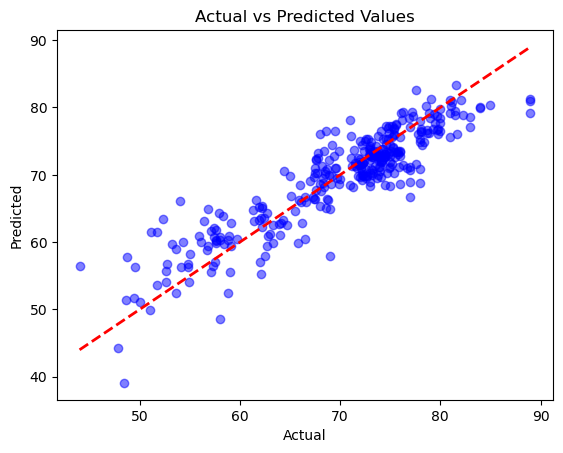

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [27]:
from joblib import dump

# Replace 'model' with the name of your trained model object
model_filename = "life_predict_model.pkl"
dump(model,model_filename)

print(f"Model saved as {model_filename}")


Model saved as life_predict_model.pkl


## Conclusion:
    In conclusion, this project demonstrates the potential of machine learning to predict human lifespan by analyzing diverse factors such as health, lifestyle, and environmental conditions. By leveraging data-driven insights, the model not only provides accurate lifespan predictions but also highlights critical areas for improvement in personal and public health strategies. This approach can empower individuals and organizations to make informed decisions, promoting healthier and longer lives.